In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
sns.set_style("whitegrid");
from sklearn.preprocessing import Normalizer
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, plot_roc_curve
# import warnings
# warnings.filterwarnings('ignore')

In [68]:
df = pd.read_csv('data.csv')

# Objective

```Employing statistical techniques, conduct a preliminary prognosis of Hypertension/hypotension, based on the level of hemoglobin and genetic history of the individual.```

# 1. Descriptive Analysis

In [69]:
# I'll only take data required for this ojbective

df = df[['Blood_Pressure_Abnormality', 'Level_of_Hemoglobin', 'Genetic_Pedigree_Coefficient']]

In [70]:
# let's check if this data requires any pre-processing/ cleaning
df.describe()
# description looks fine, may need to normalise Level_of_Hemoglobin

,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient
count,2000.000000,2000.000000,1908.000000
mean,0.493500,11.710035,0.494817
std,0.500083,2.186701,0.291736
min,0.000000,8.100000,0.000000
25%,0.000000,10.147500,0.240000
50%,0.000000,11.330000,0.490000
75%,1.000000,12.945000,0.740000
max,1.000000,17.560000,1.000000


In [71]:
print("Abnormal blood pressure cases: ", len(df[df.Blood_Pressure_Abnormality == 1]))
print("Normal blood pressure cases: ", len(df[df.Blood_Pressure_Abnormality == 0]))

print('\x1b[31mDataset is not highly imbalanced \x1b[0m')

Abnormal blood pressure cases:  987
Normal blood pressure cases:  1013
Dataset is not highly imbalanced 


In [72]:
df.isna().sum()/ df.shape[0]

# 4.6 % data in Genetic_Pedigree_Coefficient is missing

Blood_Pressure_Abnormality      0.000
Level_of_Hemoglobin             0.000
Genetic_Pedigree_Coefficient    0.046
dtype: float64

# 2. Visual/ Inferential Analysis

/Users/sumittyagi/installs/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:316: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.

/Users/sumittyagi/installs/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/Users/sumittyagi/installs/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



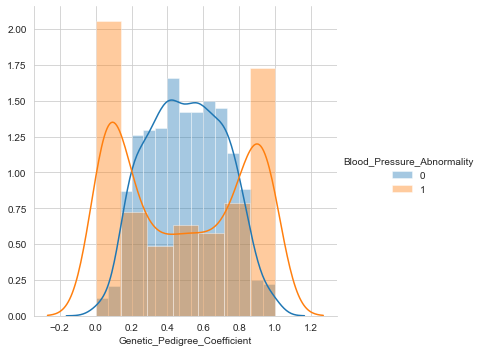

In [73]:
# let us check the distribution of Genetic_Pedigree_Coefficient with respect to Blood_Pressure_Abnormality

sns.FacetGrid(df, hue="Blood_Pressure_Abnormality", size=5) \
   .map(sns.distplot, "Genetic_Pedigree_Coefficient") \
   .add_legend();
plt.show();

```it's clear, for normal blood pressure Genetic_Pedigree_Coefficient follows roughly normal distribution. But, not with abnormal blood pressure. So, I'll replace NaN values with Mean in case of Normal BP and with Mode in case of Abnormal BP```

## Filling missing values tactically


In [74]:
missing_mask = df.Genetic_Pedigree_Coefficient.isna()
mapping_dict = dict({0: df.Genetic_Pedigree_Coefficient.mean(), 1: df.Genetic_Pedigree_Coefficient.mode()})
df.loc[missing_mask, 'Genetic_Pedigree_Coefficient'] = df.loc[missing_mask, 'Blood_Pressure_Abnormality'].map(mapping_dict)

/Users/sumittyagi/installs/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:316: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.

/Users/sumittyagi/installs/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/Users/sumittyagi/installs/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



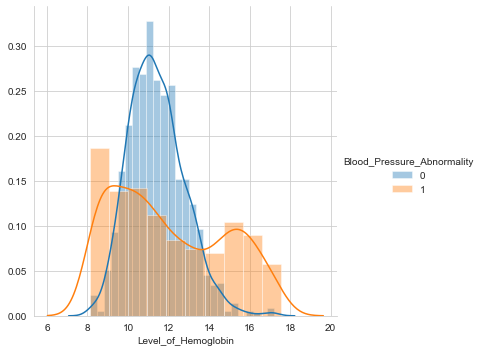

In [75]:
# let us check the distribution of Genetic_Pedigree_Coefficient with respect to Blood_Pressure_Abnormality

sns.FacetGrid(df, hue="Blood_Pressure_Abnormality", size=5) \
   .map(sns.distplot, "Level_of_Hemoglobin") \
   .add_legend();
plt.show();

```it's clear, for normal blood pressure Level_of_Hemoglobin follows roughly normal distribution. But, not with abnormal blood pressure.```

In [76]:
# let us visualise the data:

In [77]:
import plotly.express as px
fig = px.scatter(df, x="Level_of_Hemoglobin", y="Genetic_Pedigree_Coefficient", color="Blood_Pressure_Abnormality")

fig.show()

# 3. Feature Engineering

```From above 2 distribution plots and this visualisation I can say even linear regression can work with feature engineering, I'll use feature $Genetic Pedigree Coefficient^2$ + $Level of Hemoglobin^2$ with the output and check results

In [78]:
import plotly.express as px
fig = px.scatter(df, x="Level_of_Hemoglobin", y="Genetic_Pedigree_Coefficient", color="Blood_Pressure_Abnormality")
fig.add_shape(type="circle",
    xref="x", yref="y",
    x0=8.8, y0=0.1, x1=14.6, y1=0.9,
    line_color="LightSeaGreen",
)
fig.show()

In [79]:
# adding new features in it

df['Level_of_Hemoglobin_2'] = df['Level_of_Hemoglobin']**2
df['Genetic_Pedigree_Coefficient_2'] = df['Genetic_Pedigree_Coefficient']**2

df = df.astype('float64')

In [80]:
train, test = train_test_split(df)

In [81]:
Y_train = train[['Blood_Pressure_Abnormality']]
X_train = train[['Level_of_Hemoglobin_2', 'Genetic_Pedigree_Coefficient_2', 'Level_of_Hemoglobin', 'Genetic_Pedigree_Coefficient']]
Y_test = test[['Blood_Pressure_Abnormality']]
X_test = test[['Level_of_Hemoglobin_2', 'Genetic_Pedigree_Coefficient_2', 'Level_of_Hemoglobin', 'Genetic_Pedigree_Coefficient']]

# 4. Using Different Classification Algorithms

## 4.1 Logistic Regression

In [82]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(X_train, Y_train)

/Users/sumittyagi/installs/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [83]:
clf.score(X_test, Y_test)

0.85

In [84]:
Y_pred = clf.predict(X_test)

In [85]:
confusion_matrix(Y_pred, Y_test)

array([[235,  48],
       [ 27, 190]])

In [86]:
print(classification_report(Y_pred, Y_test))

              precision    recall  f1-score   support

         0.0       0.90      0.83      0.86       283
         1.0       0.80      0.88      0.84       217

    accuracy                           0.85       500
   macro avg       0.85      0.85      0.85       500
weighted avg       0.85      0.85      0.85       500



In [87]:
roc_auc_score(Y_pred, Y_test)

0.8529823647229324

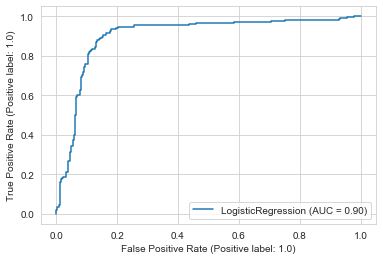

In [88]:
plot_roc_curve(clf, X_test, Y_test)
plt.show()

In [110]:
X_test['truth'] = Y_test.values
X_test['pred'] = Y_pred
X_test['errors'] = Y_test.values.flatten() == Y_pred
import plotly.express as px
fig = px.scatter(X_test, x="Level_of_Hemoglobin", y="Genetic_Pedigree_Coefficient", color="pred")
fig.add_shape(type="circle",
    xref="x", yref="y",
    x0=8.8, y0=0.1, x1=14.6, y1=0.9,
    line_color="LightSeaGreen",
)
fig.show()

In [113]:
# wrong predictions

X_test['truth'] = Y_test.values
X_test['pred'] = Y_pred
X_test['errors'] = Y_test.values.flatten() == Y_pred
import plotly.express as px
fig = px.scatter(X_test[X_test.truth == 1], x="Level_of_Hemoglobin", y="Genetic_Pedigree_Coefficient", color="pred")
fig.add_shape(type="circle",
    xref="x", yref="y",
    x0=8.8, y0=0.1, x1=14.6, y1=0.9,
    line_color="LightSeaGreen",
)
fig.show()

In [114]:
# wrong predictions

X_test['truth'] = Y_test.values
X_test['pred'] = Y_pred
X_test['errors'] = Y_test.values.flatten() == Y_pred
import plotly.express as px
fig = px.scatter(X_test[X_test.truth == 0], x="Level_of_Hemoglobin", y="Genetic_Pedigree_Coefficient", color="pred")
fig.add_shape(type="circle",
    xref="x", yref="y",
    x0=8.8, y0=0.1, x1=14.6, y1=0.9,
    line_color="LightSeaGreen",
)
fig.show()

## 4.2 

In [107]:
Y_test.values.flatten() == Y_pred

(500,)